In [1]:
import pickle

In [70]:
# load the benchmark results from the pickle file
with open('../save/HypoMap_Steuernagel-Jul08-2154/benchmark_cell_type_Jul08-2154.pkl', 'rb') as f:
    bm_results = pickle.load(f)

In [4]:
bm_results

{'scib':              Bio conservation                                               \
               Isolated labels KMeans NMI KMeans ARI Silhouette label cLISI   
 Embedding                                                                    
 liger                 0.30035   0.663676   0.581463          0.59051   1.0   
 harmony              0.556782   0.677302   0.357596         0.662326   1.0   
 scvi                 0.706173   0.638173   0.278941         0.569639   1.0   
 concord_hcl          0.724998   0.308138   0.073627         0.456363   1.0   
 concord_knn          0.617303   0.500541   0.209686         0.516384   1.0   
 scanorama            0.598527   0.632027   0.284778         0.582736   1.0   
 unintegrated         0.607795   0.606463   0.279194         0.561096   1.0   
 contrastive          0.591595   0.452181    0.09856         0.501018   1.0   
 
              Batch correction                                         \
              Silhouette batch     iLISI      KB

In [5]:
import argparse
import time
from pathlib import Path
import scanpy as sc
import pandas as pd
import pickle
import concord as ccd

In [91]:
file_suffix = time.strftime("%b%d-%H%M")

proj_name = "HypoMap_Steuernagel"
file_name = "HypoMap_Steuernagel"
batch_key = "Batch_ID"
state_key = "cell_type"
methods = ["unintegrated", "harmony", "liger", "scanorama", "scvi", "contrastive", "concord_knn", "concord_hcl"]

script_dir = Path("../notebook/run_viscello_and_benchmark.py").parent.resolve()
project_root = script_dir.parent

# File lives in: <project_root>/data/<proj_name>/<file_name>_final.h5ad
data_dir = (project_root / "data" / proj_name).resolve()
adata_path = data_dir / f"{file_name}_final.h5ad"

# Output locations
save_dir = project_root / "save" / f"{proj_name}-{file_suffix}"
benchmark_pkl_path = save_dir / f"benchmark_{state_key}_{file_suffix}.pkl"

In [72]:
adata = sc.read(adata_path)

In [73]:
methods = ["concord_knn"]

concord.benchmarking.benchmark - INFO - Running SCIB benchmark


/home/ec2-user/miniconda3/envs/concord_env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(adata, mask_var, use_highly_variable)
Embeddings:   0%|          | 0/1 [00:00<?, ?it/s]/home/ec2-user/miniconda3/envs/concord_env/lib/python3.12/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings: 100%|██████████| 1/1 [14:20<00:00, 860.61s/it]


concord.benchmarking.benchmark - INFO - Running Probe benchmark
concord.benchmarking.benchmark - INFO - Running linear probe for state with keys ['concord_knn']
Detected task: classification
concord.benchmarking.benchmark - INFO - Running linear probe for batch with keys ['concord_knn']
Detected task: classification
concord.benchmarking.benchmark - INFO - Running k-NN probe for state with keys ['concord_knn']
[KNN] detected task: classification
concord.benchmarking.benchmark - INFO - Running k-NN probe for batch with keys ['concord_knn']
[KNN] detected task: classification


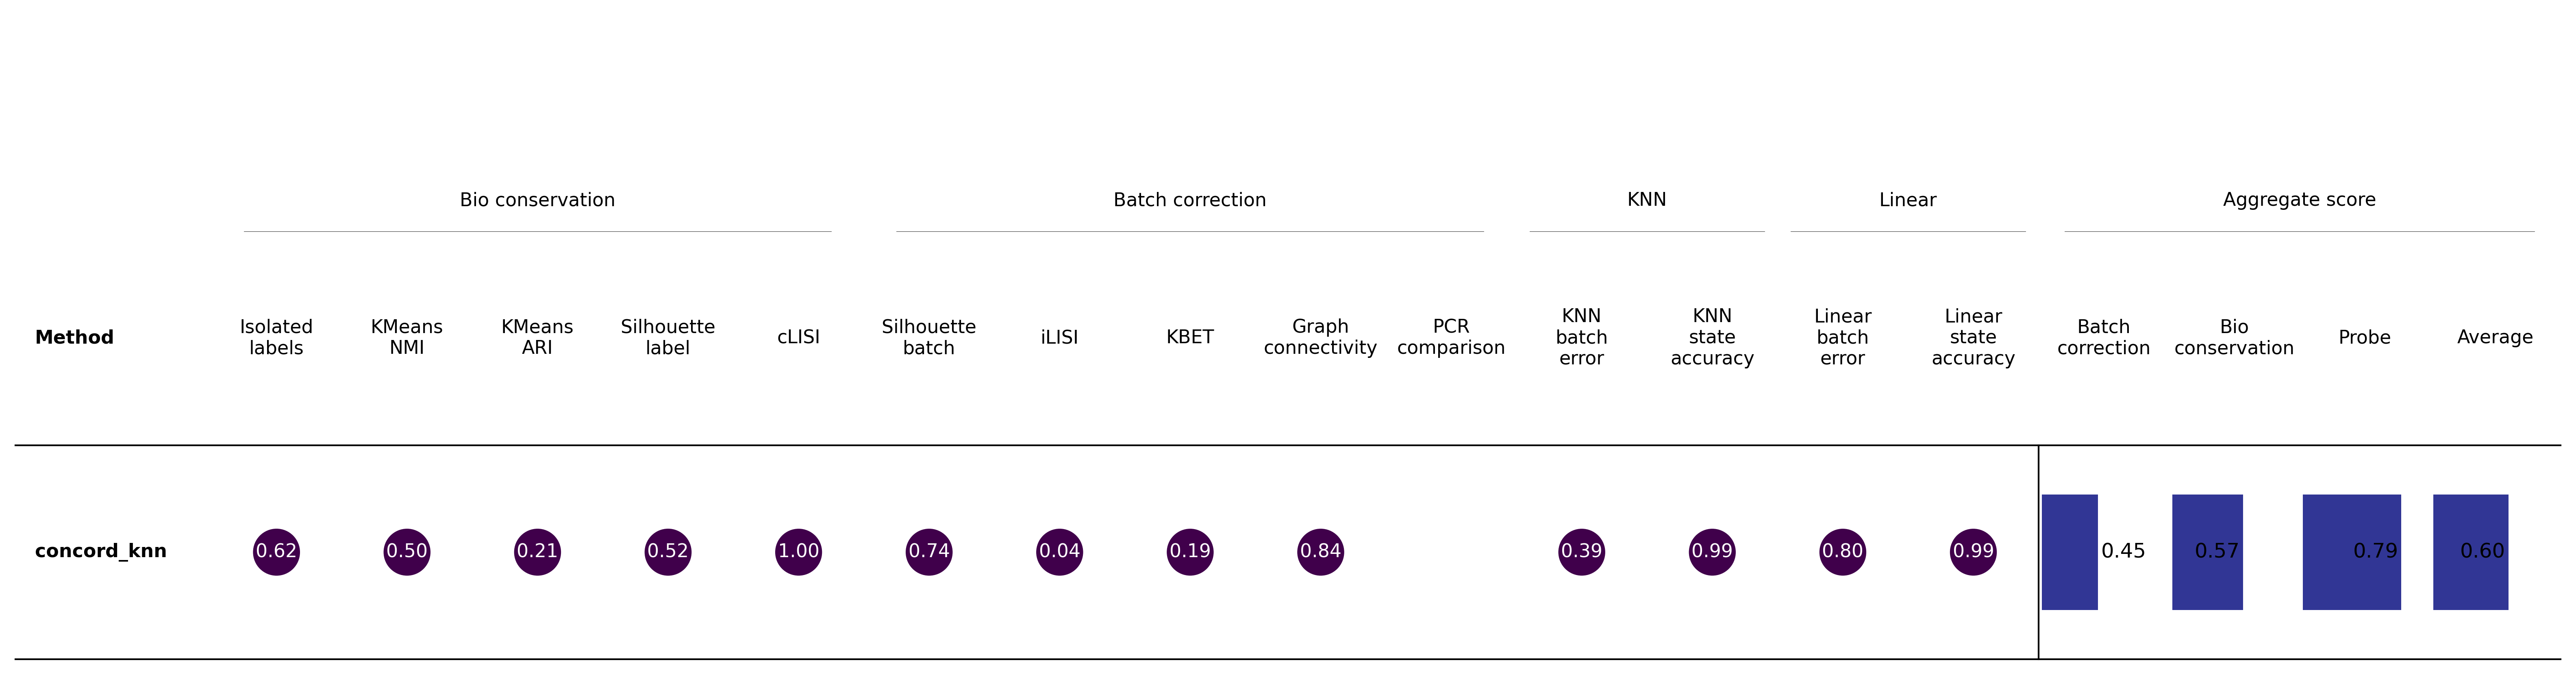

✅ Benchmark results saved → /home/ec2-user/Concord_benchmark/save/HypoMap_Steuernagel-Jul09-0638/benchmark_cell_type_Jul09-0638.pkl

✨ All done! ✨


In [27]:
out = ccd.bm.run_benchmark_pipeline(
    adata,
    embedding_keys=methods,
    state_key=state_key,
    batch_key=batch_key,
    save_dir=save_dir / "benchmarks_celltype",
    file_suffix=file_suffix,
    run=("scib", "probe"),
    plot_individual=False,
)

# Save results
try:
    with open(benchmark_pkl_path, "wb") as f:
        pickle.dump(out, f)
    print(f"✅ Benchmark results saved → {benchmark_pkl_path}")
except Exception as e:
    print(f"❌ Could not save benchmark results: {e}")
    exit(1)

print("\n✨ All done! ✨")

In [30]:
out

{'scib':             Bio conservation                                               \
              Isolated labels KMeans NMI KMeans ARI Silhouette label cLISI   
 Embedding                                                                   
 concord_knn         0.617303   0.500541   0.209686         0.516384   1.0   
 
             Batch correction                                        \
             Silhouette batch     iLISI     KBET Graph connectivity   
 Embedding                                                            
 concord_knn         0.736482  0.043497  0.18961           0.844259   
 
                             Aggregate score                             
             PCR comparison Batch correction Bio conservation     Total  
 Embedding                                                               
 concord_knn            NaN         0.453462         0.568783  0.522654  ,
 'probe':                      KNN                       Linear                   Probe
       

----

In [31]:
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection

In [34]:
BatchCorrection()

BatchCorrection(silhouette_batch=True, ilisi_knn=True, kbet_per_label=True, graph_connectivity=True, pcr_comparison=True)

In [74]:
bm = Benchmarker(
    adata,
    batch_key="Batch_ID",
    label_key="cell_type",
    bio_conservation_metrics=BioConservation(isolated_labels=False, nmi_ari_cluster_labels_leiden=False, nmi_ari_cluster_labels_kmeans=False, silhouette_label=False, clisi_knn=False),
    batch_correction_metrics=BatchCorrection(silhouette_batch=False, ilisi_knn=False, kbet_per_label=False, graph_connectivity=False, pcr_comparison=True),
    embedding_obsm_keys=["concord_knn"],
    n_jobs=1,
)
bm.benchmark()

/home/ec2-user/miniconda3/envs/concord_env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(adata, mask_var, use_highly_variable)
Embeddings: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


In [75]:
ad = bm._emb_adatas['concord_knn']

In [76]:
ad

AnnData object with n_obs × n_vars = 384925 × 50
    obs: 'SRA_ID', 'Sample_ID', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'Dataset', 'Batch_ID', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'C7_named', 'C25_named', 'C66_named', 'C185_named', 'C286_named', 'C465_named', 'Author_Class_Curated', 'Author_CellType', 'Region_summarized', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'batch', 'labels'
    uns: '15_neighbor_res', '50_neighb

In [39]:
print("X shape (post-integration):", ad.X.shape)             # should be (384925, d)
print("X_pre shape:", ad.obsm["X_pre"].shape)                # should also be (384925, d')


X shape (post-integration): (384925, 50)
X_pre shape: (384925, 50)


In [40]:
import numpy as np

In [41]:
print("NaN in X:", np.isnan(ad.X).any())
print("NaN in X_pre:", np.isnan(ad.obsm["X_pre"]).any())

print("Constant columns in X_pre:", (np.std(ad.obsm["X_pre"], axis=0) == 0).sum())

NaN in X: False
NaN in X_pre: False
Constant columns in X_pre: 0


In [42]:
print("Unique batches:", ad.obs["batch"].unique())
print("Number of batches:", ad.obs['batch'].nunique())
print("NaNs in batch:", ad.obs["batch"].isna().sum())


Unique batches: ['Affinati10x_batch_1' 'Affinati10x_batch_2' 'Affinati10x_batch_3'
 'Affinati10x_batch_4' 'Anderson10x_batch_1' 'CampbellDropseq_batch_1'
 'CampbellDropseq_batch_2' 'ChenDropseq_batch_1' 'Dowsett10xnuc_batch_1'
 'Dowsett10xnuc_batch_2' 'Flynn10x_batch_1' 'Flynn10x_batch_2'
 'Kim10x_batch_1' 'kimDev10x_batch_1' 'LeeDropseq_batch_1'
 'Mickelsen10x_batch_1' 'Moffit10x_batch_1' 'Moffit10x_batch_2'
 'Moffit10x_batch_3' 'Morris10x_batch_1' 'Morris10x_batch_2'
 'Morris10x_batch_3' 'Mousebrainorg10x_batch_1' 'Mousebrainorg10x_batch_2'
 'RomanovDev10x_batch_1' 'RossiDropseq_batch_1' 'Rupp10x_batch_1'
 'wen10x_batch_1' 'wenDropseq_batch_1']
Number of batches: 29
NaNs in batch: 0


In [43]:
from scib_metrics import pcr_comparison

score = pcr_comparison(
    X_pre=ad.obsm["X_pre"],
    X_post=ad.X,
    covariate=ad.obs["batch"].values,
    categorical=True,
)
print("PCR score:", score)


PCR score: nan


In [44]:
print(ad.X.shape)
print(ad.obsm["X_pre"].shape)
print("NaNs in X:", np.isnan(ad.X).any())
print("NaNs in X_pre:", np.isnan(ad.obsm["X_pre"]).any())
print("Unique batch count:", ad.obs['batch'].nunique())
print("Unique batches:", np.unique(ad.obs['batch']))


(384925, 50)
(384925, 50)
NaNs in X: False
NaNs in X_pre: False
Unique batch count: 29
Unique batches: ['Affinati10x_batch_1' 'Affinati10x_batch_2' 'Affinati10x_batch_3'
 'Affinati10x_batch_4' 'Anderson10x_batch_1' 'CampbellDropseq_batch_1'
 'CampbellDropseq_batch_2' 'ChenDropseq_batch_1' 'Dowsett10xnuc_batch_1'
 'Dowsett10xnuc_batch_2' 'Flynn10x_batch_1' 'Flynn10x_batch_2'
 'Kim10x_batch_1' 'LeeDropseq_batch_1' 'Mickelsen10x_batch_1'
 'Moffit10x_batch_1' 'Moffit10x_batch_2' 'Moffit10x_batch_3'
 'Morris10x_batch_1' 'Morris10x_batch_2' 'Morris10x_batch_3'
 'Mousebrainorg10x_batch_1' 'Mousebrainorg10x_batch_2'
 'RomanovDev10x_batch_1' 'RossiDropseq_batch_1' 'Rupp10x_batch_1'
 'kimDev10x_batch_1' 'wen10x_batch_1' 'wenDropseq_batch_1']


In [45]:
def principal_component_regression(X, covariate, categorical=True, **kwargs):
    import numpy as np
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import OneHotEncoder, StandardScaler

    print("▶️ PCR DEBUG")
    print("X shape:", X.shape)
    print("Covariate shape:", covariate.shape)
    print("Unique covariate values:", np.unique(covariate))

    # Apply PCA
    pca = PCA(n_components=min(50, X.shape[1]))  # in your case 50
    X_pca = pca.fit_transform(X)
    print("Explained variance (PCA):", pca.explained_variance_ratio_[:5])

    if categorical:
        covariate = OneHotEncoder(sparse_output=False, drop="if_binary").fit_transform(covariate.reshape(-1, 1))
        print("One-hot shape:", covariate.shape)

    reg = LinearRegression()
    try:
        reg.fit(covariate, X_pca)
        score = reg.score(covariate, X_pca)
    except Exception as e:
        print("⚠️ Regression failed:", e)
        return np.nan

    print("📈 Regression score (PCR):", score)
    return score


In [46]:
score = pcr_comparison(
    X_pre=ad.obsm["X_pre"],
    X_post=ad.X,
    covariate=ad.obs["batch"].values,
    categorical=True,
)
print("✅ Final PCR score:", score)


✅ Final PCR score: nan


In [77]:
X_pre=ad.obsm["X_pre"]
X_post=ad.X
covariate=ad.obs["batch"].values

if X_pre.shape[0] != X_post.shape[0]:
    raise ValueError("Dimension mismatch: `X_pre` and `X_post` must have the same number of samples.")
if covariate.shape[0] != X_pre.shape[0]:
    raise ValueError("Dimension mismatch: `X_pre` and `covariate` must have the same number of samples.")


In [54]:
# ------------------------------------------------------------------
# Imports and helpers
# ------------------------------------------------------------------
import jax.numpy as jnp
import numpy as np
import pandas as pd
from jax import jit

from scib_metrics._types import NdArray

# Quick test without actual import structure
from sklearn.decomposition import PCA
import numpy as np

def pca(X, n_components=None):
    pca_model = PCA(n_components=n_components)
    coords = pca_model.fit_transform(X)
    return type("PCAResult", (), {
        "coordinates": coords,
        "variance": pca_model.explained_variance_ratio_
    })()

def one_hot(x):
    return np.eye(np.max(x) + 1)[x]


# ------------------------------------------------------------------
# High-level wrapper
# ------------------------------------------------------------------
def principal_component_regression(
    X: NdArray,
    covariate: NdArray,
    categorical: bool = False,
    n_components: int | None = None,
) -> float:
    """
    Principal component regression (PCR) – Büttner 2018.
    ---------------------------------------------------
    X            : (n_cells, n_features)
    covariate    : (n_cells,) or (n_cells, 1)
    categorical  : treat covariate as categorical → one-hot encode
    n_components : how many PCs to keep (None = all)
    Returns
    -------
    Float R²-weighted variance explained by covariate.
    """
    # ------------------ sanity checks ------------------
    if X.ndim != 2:
        raise ValueError("X must be 2-D (cells × features).")
    if X.shape[0] != covariate.shape[0]:
        raise ValueError("X and covariate must have same #cells.")

    # ------------------ encode covariate ---------------
    if categorical:
        covariate = np.asarray(pd.Categorical(covariate).codes)
    else:
        covariate = np.asarray(covariate)

    covariate = (
        one_hot(covariate)                  # (n_cells, n_batches)
        if categorical
        else covariate.reshape(-1, 1)       # (n_cells, 1)
    )

    # ------------------ PCA ----------------------------
    pca_res = pca(X, n_components=n_components)
    X_pca, var = pca_res.coordinates, pca_res.variance

    # ------------------ centre covariate ---------------
    covariate = covariate - jnp.mean(covariate, axis=0)

    # ------------------ core PCR -----------------------
    pcr_val = _pcr(X_pca, covariate, var)
    return float(pcr_val)

# ------------------------------------------------------------------
# >>> Patched low-level routine <<< 
# ------------------------------------------------------------------
@jit
def _pcr(
    X_pca: NdArray,
    covariate: NdArray,
    var: NdArray,
) -> NdArray:
    """
    Core PCR with perfect-fit safeguard.
    ------------------------------------
    X_pca   : (n_cells, n_components)
    covariate : (n_cells, n_covs)
    var     : variance per PC (length = n_components)
    """
    # lstsq returns (coeffs, residuals, rank, s)
    # residuals = []  ⇢  perfect linear fit  ⇢  we must guard.
    coeffs, residual_sum, *_ = jnp.linalg.lstsq(covariate, X_pca)

    # --- handle perfect fit ---------------------------------------
    if residual_sum.size == 0:                      # <-- safeguard
        r2 = jnp.ones(X_pca.shape[1])              # R² = 1 for all PCs
    else:
        total_sum = jnp.sum(
            (X_pca - jnp.mean(X_pca, axis=0, keepdims=True)) ** 2,
            axis=0,
        )
        r2 = jnp.maximum(0, 1 - residual_sum / total_sum)

    # --- variance-weighted global score ---------------------------
    return jnp.dot(r2.ravel(), var) / jnp.sum(var)


In [78]:
pcr_pre = principal_component_regression(X_pre, covariate, categorical=True)
pcr_post = principal_component_regression(X_post, covariate, categorical=True)

# Step 4: Compute PCR comparison
if pcr_pre == 0:
    print("⚠️ Warning: pcr_pre is zero, cannot compute relative drop. Setting comparison to 0.")
    pcr_comparison_score = 0.0
else:
    pcr_comparison_score = max(0.0, (pcr_pre - pcr_post) / pcr_pre)

print("✅ PCR comparison score:", pcr_comparison_score)

✅ PCR comparison score: 0.9668547946077128


In [79]:
print("pcr_pre:", pcr_pre)
print("pcr_post:", pcr_post)

pcr_pre: 0.31755247712135315
pcr_post: 0.01052534207701683


✅ PCR comparison score: 0.9668547946077128

In [80]:
bm_results['scib']['Batch correction']['PCR comparison']['concord_knn']

nan

In [84]:
type(bm_results)  # is it a dict or DataFrame?


dict

In [87]:
print(type(bm_results))                # → dict ✅
print(type(bm_results['scib']))        # ← probably also a dict ✅
print(type(bm_results['scib']['Batch correction']))  # ← DataFrame ✅
print(type(bm_results['scib']['Batch correction']['PCR comparison']))  # ← also a DataFrame ✅

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [88]:
print(bm_results.keys())         # should show 'scib' and maybe others

print(bm_results['scib'].head()) # this will show if it's a DataFrame of scores

# Check what columns and rows are
print("rows:", bm_results['scib'].index)
print("columns:", bm_results['scib'].columns)


dict_keys(['scib', 'probe', 'combined'])
            Bio conservation                                               \
             Isolated labels KMeans NMI KMeans ARI Silhouette label cLISI   
Embedding                                                                   
liger                0.30035   0.663676   0.581463          0.59051   1.0   
harmony             0.556782   0.677302   0.357596         0.662326   1.0   
scvi                0.706173   0.638173   0.278941         0.569639   1.0   
concord_hcl         0.724998   0.308138   0.073627         0.456363   1.0   
concord_knn         0.617303   0.500541   0.209686         0.516384   1.0   

            Batch correction                                         \
            Silhouette batch     iLISI      KBET Graph connectivity   
Embedding                                                             
liger               0.724577  0.156495  0.562671           0.676232   
harmony             0.876632  0.055382  0.246171          

In [125]:
bm_results_updated = bm_results.copy()

In [104]:
bm_results_updated.keys()

dict_keys(['scib', 'probe', 'combined'])

In [126]:
# 1. Update PCR score
bm_results_updated['scib'].loc['concord_knn', ('Batch correction', 'PCR comparison')] = pcr_comparison_score
bm_results_updated['combined'].loc['concord_knn', ('Batch correction', 'PCR comparison')] = pcr_comparison_score

# 2. Recalculate Batch correction aggregate
batch_cols = [col for col in bm_results_updated['combined'].columns if col[0] == 'Batch correction']
bm_results_updated['combined'].loc['concord_knn', ('Aggregate score', 'Batch correction')] = \
    bm_results_updated['combined'].loc['concord_knn', batch_cols].mean()

# 3. Recalculate overall average
agg_cols = [col for col in bm_results_updated['combined'].columns
            if col[0] == 'Aggregate score' and col[1] != 'Average']
bm_results_updated['combined'].loc['concord_knn', ('Aggregate score', 'Average')] = \
    bm_results_updated['combined'].loc['concord_knn', agg_cols].mean()

# 4. Re-sort (optional)
bm_results_updated['combined'] = bm_results_updated['combined'].sort_values(
    by=('Aggregate score', 'Average'), ascending=False
)


In [128]:
print(benchmark_pkl_path)
benchmark_pkl_path.parent.mkdir(parents=True, exist_ok=True)


/home/ec2-user/Concord_benchmark/save/HypoMap_Steuernagel-Jul09-0957/benchmark_cell_type_Jul09-0957.pkl


In [129]:
try:
    with open(benchmark_pkl_path, "wb") as f:
        pickle.dump(bm_results_updated, f)
    print(f"✅ Benchmark results saved → {benchmark_pkl_path}")
except Exception as e:
    print(f"❌ Could not save benchmark results: {e}")
    exit(1)

✅ Benchmark results saved → /home/ec2-user/Concord_benchmark/save/HypoMap_Steuernagel-Jul09-0957/benchmark_cell_type_Jul09-0957.pkl


In [130]:
# load the benchmark results from the pickle file
with open('../save/HypoMap_Steuernagel-Jul09-0957/benchmark_cell_type_Jul09-0957.pkl', 'rb') as f:
    bm_results_updated = pickle.load(f)

In [131]:
bm_results_updated['combined']

Bio conservation                                               \
              Isolated labels KMeans NMI KMeans ARI Silhouette label cLISI   
liger                 0.30035   0.663676   0.581463          0.59051   1.0   
harmony              0.556782   0.677302   0.357596         0.662326   1.0   
concord_knn          0.617303   0.500541   0.209686         0.516384   1.0   
concord_hcl          0.724998   0.308138   0.073627         0.456363   1.0   
scvi                 0.706173   0.638173   0.278941         0.569639   1.0   
scanorama            0.598527   0.632027   0.284778         0.582736   1.0   
unintegrated         0.607795   0.606463   0.279194         0.561096   1.0   
contrastive          0.591595   0.452181    0.09856         0.501018   1.0   

             Batch correction                                         \
             Silhouette batch     iLISI      KBET Graph connectivity   
liger                0.724577  0.156495  0.562671           0.676232   
harmony              0.876632  0.055382  0.246171           0.737012   
concord_knn          0.736482  0.043497   0.18961           0.844259   
concord_hcl          0.771436  0.063954  0.211279           0.885049   
scvi                 0.887361  0.025953  0.202361           0.928563   
scanorama            0.849632  0.011703  0.065334            0.62578   
unintegrated         0.909927  0.001724  0.124996           0.459901   
contrastive          0.620443  0.003388  0.078213           0.718326   

                                     KNN                       Linear  \
             PCR comparison batch\nerror state\naccuracy batch\nerror   
liger              0.940773     0.720985        0.960992     0.828083   
harmony             0.79888     0.425044        0.981061     0.822537   
concord_knn        0.966855     0.393570        0.991596     0.801221   
concord_hcl        0.965183     0.472066        0.991505     0.800117   
scvi                 0.7189     0.202351        0.993440     0.422121   
scanorama                 0     0.221693        0.990777     0.280470   
unintegrated       0.039267     0.154796        0.989154     0.046568   
contrastive        0.060563     0.178645        0.991180     0.176177   

                              Aggregate score                             \
             state\naccuracy Batch correction Bio conservation     Probe   
liger               0.834799          0.61215           0.6272  0.836215   
harmony             0.967656         0.542816         0.650801  0.799074   
concord_knn         0.988128          0.55614         0.568783  0.793629   
concord_hcl         0.981724          0.57938         0.512625  0.811353   
scvi                0.993245         0.552628         0.638585  0.652790   
scanorama           0.989842          0.31049         0.619614  0.620696   
unintegrated        0.991908         0.307163         0.610909  0.545606   
contrastive         0.990518         0.296187         0.528671  0.584130   

                        
               Average  
liger         0.691855  
harmony        0.66423  
concord_knn   0.639517  
concord_hcl   0.634453  
scvi          0.614668  
scanorama     0.516933  
unintegrated  0.487893  
contrastive   0.469662

In [110]:
bm_results_updated

{'scib':              Bio conservation                                               \
               Isolated labels KMeans NMI KMeans ARI Silhouette label cLISI   
 Embedding                                                                    
 liger                 0.30035   0.663676   0.581463          0.59051   1.0   
 harmony              0.556782   0.677302   0.357596         0.662326   1.0   
 scvi                 0.706173   0.638173   0.278941         0.569639   1.0   
 concord_hcl          0.724998   0.308138   0.073627         0.456363   1.0   
 concord_knn          0.617303   0.500541   0.209686         0.516384   1.0   
 scanorama            0.598527   0.632027   0.284778         0.582736   1.0   
 unintegrated         0.607795   0.606463   0.279194         0.561096   1.0   
 contrastive          0.591595   0.452181    0.09856         0.501018   1.0   
 
              Batch correction                                         \
              Silhouette batch     iLISI      KB

In [132]:
combined_df = bm_results_updated['combined']

In [139]:
save_dir = save_dir / "benchmarks_celltype"

print(save_dir)
save_dir.mkdir(parents=True, exist_ok=True)

/home/ec2-user/Concord_benchmark/save/HypoMap_Steuernagel-Jul09-0957/benchmarks_celltype


In [140]:
table_plot_kw = dict(
        pal="PRGn", pal_agg="RdYlBu_r", cmap_method="minmax", dpi=300)


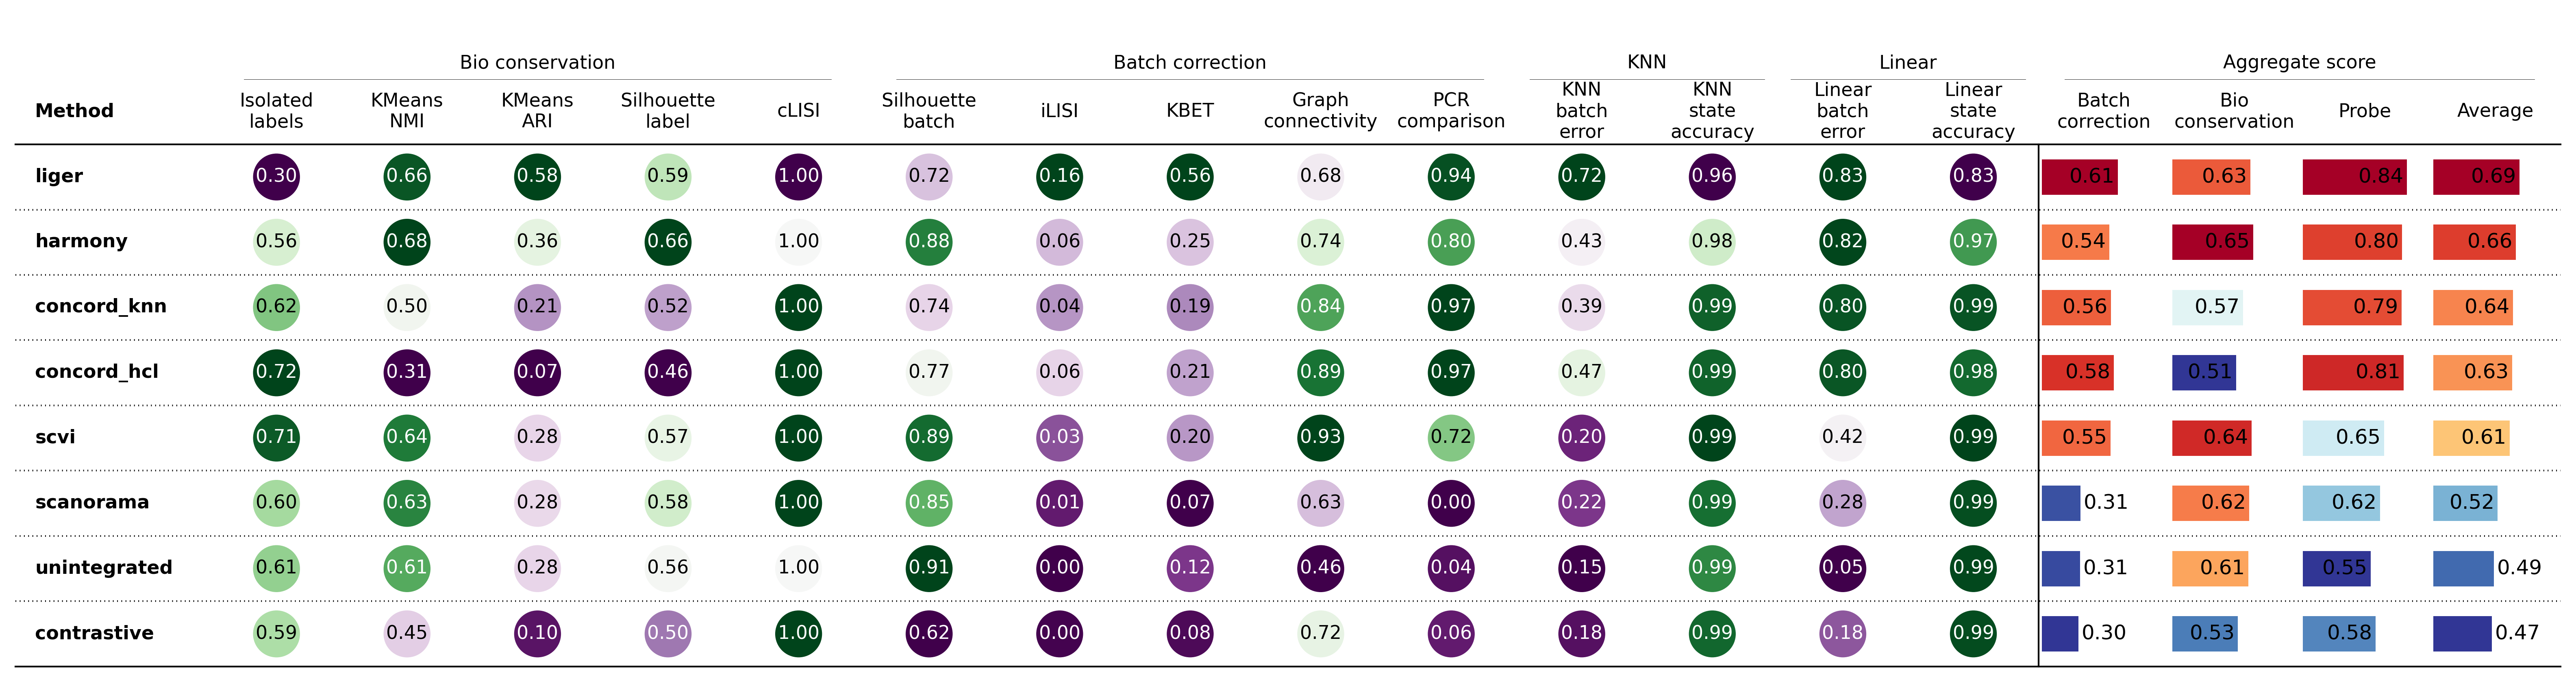

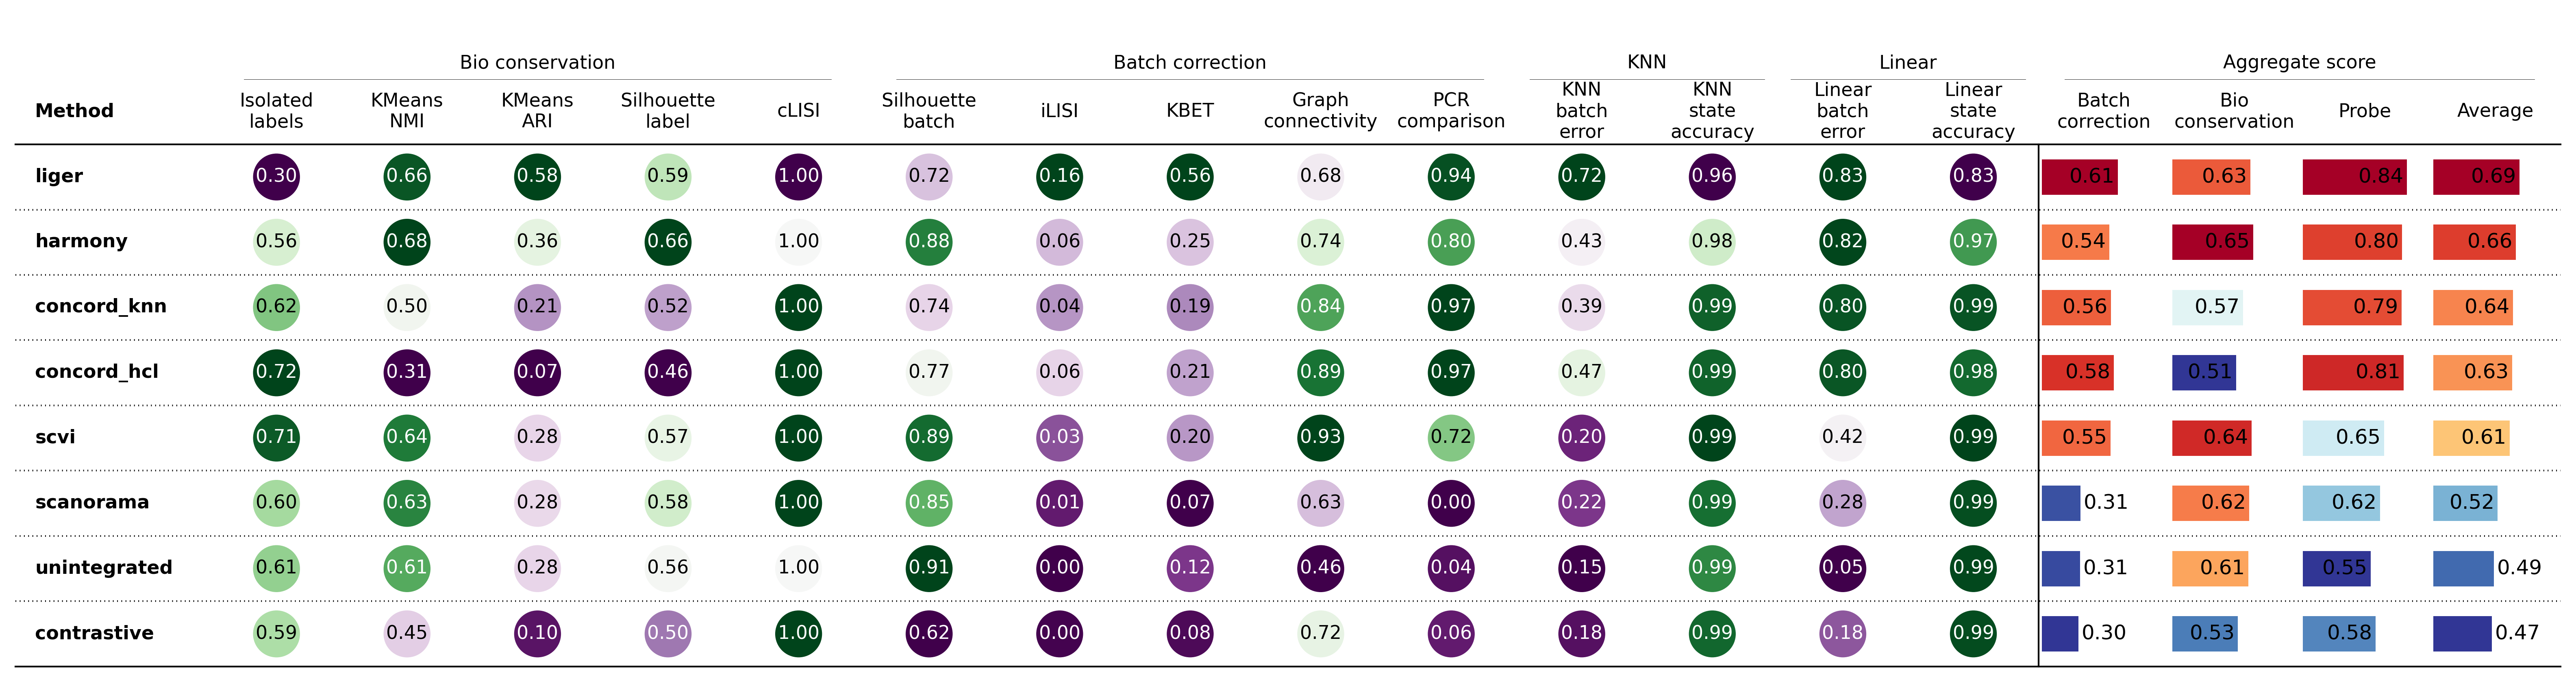

In [141]:
ccd.pl.plot_benchmark_table(
    combined_df,
    save_path=save_dir / f"combined_res_{file_suffix}.pdf",
    agg_name="Aggregate score",
    figsize=(max(8, 1.5 * len(combined_df.columns)), 7),
    **table_plot_kw,

)

----

In [56]:
adata = sc.read("../data/dkd_Wilson/dkd_Wilson_final.h5ad")

In [57]:
bm = Benchmarker(
    adata,
    batch_key="sample_uuid",
    label_key="cell_type",
    bio_conservation_metrics=BioConservation(isolated_labels=False, nmi_ari_cluster_labels_leiden=False, nmi_ari_cluster_labels_kmeans=False, silhouette_label=False, clisi_knn=False),
    batch_correction_metrics=BatchCorrection(silhouette_batch=False, ilisi_knn=False, kbet_per_label=False, graph_connectivity=False, pcr_comparison=True),
    embedding_obsm_keys=["concord_knn"],
    n_jobs=1,
)
bm.benchmark()

/home/ec2-user/miniconda3/envs/concord_env/lib/python3.12/site-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(adata, mask_var, use_highly_variable)
Embeddings: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


In [58]:
ad = bm._emb_adatas['concord_knn']

In [59]:
ad

AnnData object with n_obs × n_vars = 39176 × 50
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'reported_diseases', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rpl', 'percent.rps', 'doublet_id', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'b

In [60]:
X_pre=ad.obsm["X_pre"]
X_post=ad.X
covariate=ad.obs["batch"].values

if X_pre.shape[0] != X_post.shape[0]:
    raise ValueError("Dimension mismatch: `X_pre` and `X_post` must have the same number of samples.")
if covariate.shape[0] != X_pre.shape[0]:
    raise ValueError("Dimension mismatch: `X_pre` and `covariate` must have the same number of samples.")


In [61]:
pcr_pre = principal_component_regression(X_pre, covariate, categorical=True)
pcr_post = principal_component_regression(X_post, covariate, categorical=True)

# Step 4: Compute PCR comparison
if pcr_pre == 0:
    print("⚠️ Warning: pcr_pre is zero, cannot compute relative drop. Setting comparison to 0.")
    pcr_comparison_score = 0.0
else:
    pcr_comparison_score = max(0.0, (pcr_pre - pcr_post) / pcr_pre)

print("✅ PCR comparison score:", pcr_comparison_score)

✅ PCR comparison score: 0.9588516869284794


check another dataset if the updated function matches the previous function's result.

✅ PCR comparison score: 0.9588516869284794. 
  
while the previous result is bm_results['scib']['Batch correction']['PCR comparison']['concord_knn'].  
0.9588515953413798

In [62]:
# load the benchmark results from the pickle file
with open('../save/dkd_Wilson-Jul07-2235/benchmark_cell_type_Jul07-2235.pkl', 'rb') as f:
    bm_results = pickle.load(f)

In [69]:
bm_results['scib']['Batch correction']['PCR comparison']['concord_knn']

0.9588515953413798